In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize":(10,10)})


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [177]:
try:
    del model
except:
    pass
tf.keras.backend.clear_session()
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
                             ]
                            )

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, verbose=True)

Epoch 1/15
1875/1875 [==============================] - 1s 708us/step - loss: 2.3434 - accuracy: 0.7366 - val_loss: 0.5994 - val_accuracy: 0.8545

In [179]:
y_pred = model.predict(x_test).argmax(axis=1)

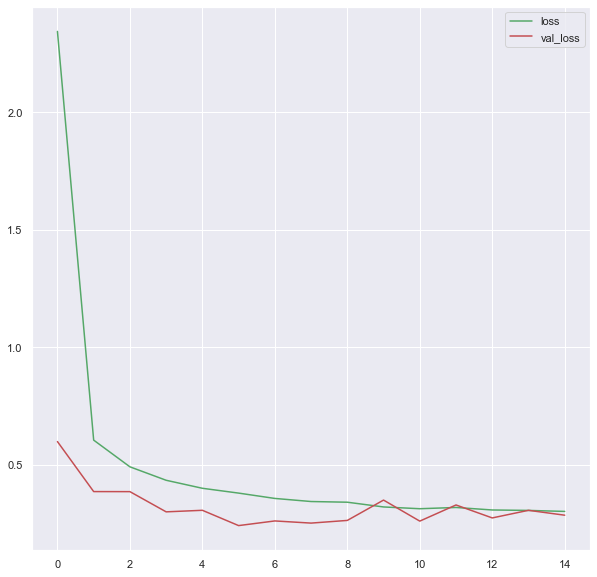

In [180]:
# history.history.get('accuracy')

# plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('loss'), label='loss', c='g')
plt.plot(history.history.get('val_loss'),label='val_loss', c='r')
plt.legend()
plt.show()

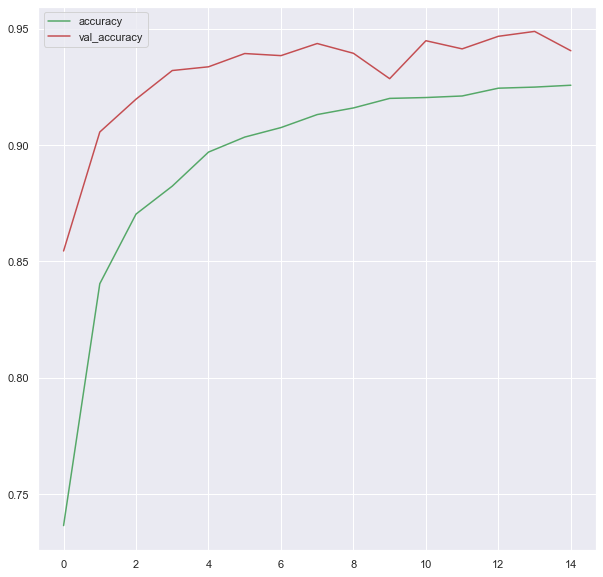

In [181]:
plt.plot(history.history.get('accuracy'), label='accuracy', c='g')
plt.plot(history.history.get('val_accuracy'),label='val_accuracy', c='r')
plt.legend()
plt.show()

In [182]:
from sklearn.metrics import confusion_matrix as cm

c_mat = cm(y_test, y_pred)

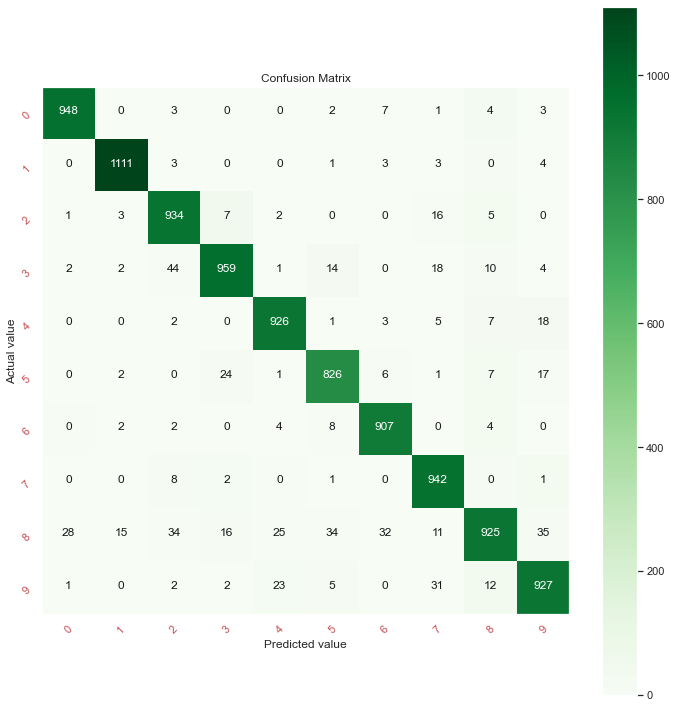

In [183]:
import itertools
plt.imshow(c_mat,interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
plt.xticks(np.arange(0,10), rotation=45, color='r')
plt.yticks(np.arange(0,10), rotation=45, color='r')
plt.title('Confusion Matrix')
for row,col in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
    plt.text(row,col, c_mat[row][col], color='k' if c_mat[row][col]<600 else 'w', horizontalalignment='center')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.tight_layout()
plt.grid()

In [184]:
idx = np.where(y_pred!= y_test)

Text(0.5, 1.0, 'Actual value: 1 and predicted value: 8')

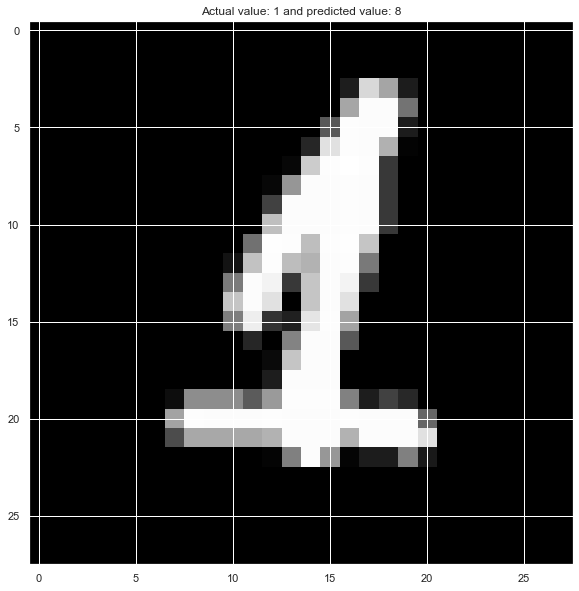

In [193]:
random_idx = np.random.choice(idx[0])
plt.imshow(x_test[random_idx], cmap='gray')
plt.title('Actual value: {} and predicted value: {}'.format(y_test[random_idx], y_pred[random_idx]))